In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import tree, ensemble
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import KFold
from collections import defaultdict
import pprint

In [2]:
# Assignment Constants
RANDOM_STATE = 10
FIGSIZE = (12,8)
#### Use the following line before plt.plot(....) to increase the plot size ####
# plt.figure(figsize=FIGSIZE)

## Question 1 
Use the breast cancer data set from Homework 0 to create a training set. Recall that the
label is 0 if the patient’s data indicates a malignant cancer and 1 otherwise. Compute the
base rate of malignant cancer occurrence over the entire data set. In other words, what would
be your best guess for the probability of malignant cancer of a single example using only the
labels in the training set? This question is very simple, so try not to overthink it.

In [6]:
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
df['target'] = cancer.target

malignant = df[df['target']== 0].shape[0]
total_counts = df.shape[0]

probability = malignant/total_counts
probability

0.37258347978910367

Answer: Base rate of malignant cancer occurrence over the entire data set is 0.37258347978910367 

## 2
The goal is to build a decision tree that, based on the other features in the set, predicts
whether or not a patient has malignant cancer. So this is a classification problem. Using
`tree.DecisionTreeClassifier` and other functions in the scikit-learn library, one can build
a decision tree and calculate both its training accuracy when fitted to the entire data set as
well as its accuracy using 10-fold cross validation (which gives a better idea of true accuracy).
In this question you will need to complete two sub-components:
### (a) 
(a) Make a plot visualizing the performance of a `tree.DecisionTreeClassifier` as you
search for an optimal `max_depth` parameter. Vary the depth of your decision tree using
max depth = 1,2,. . . ,10 and record the results from the following evaluation procedures
for each setting:
* The accuracy when training and testing on the full dataset.
* 10-fold cross-validated accuracy.

Plot the results of both evaluation procedures on the same plot with evaluation scores on
the y-axis and max depth values on the x-axis. Use 10 as your random seed/state for the
decision tree and the cross-validation. Use a legend to label both evaluation procedures.


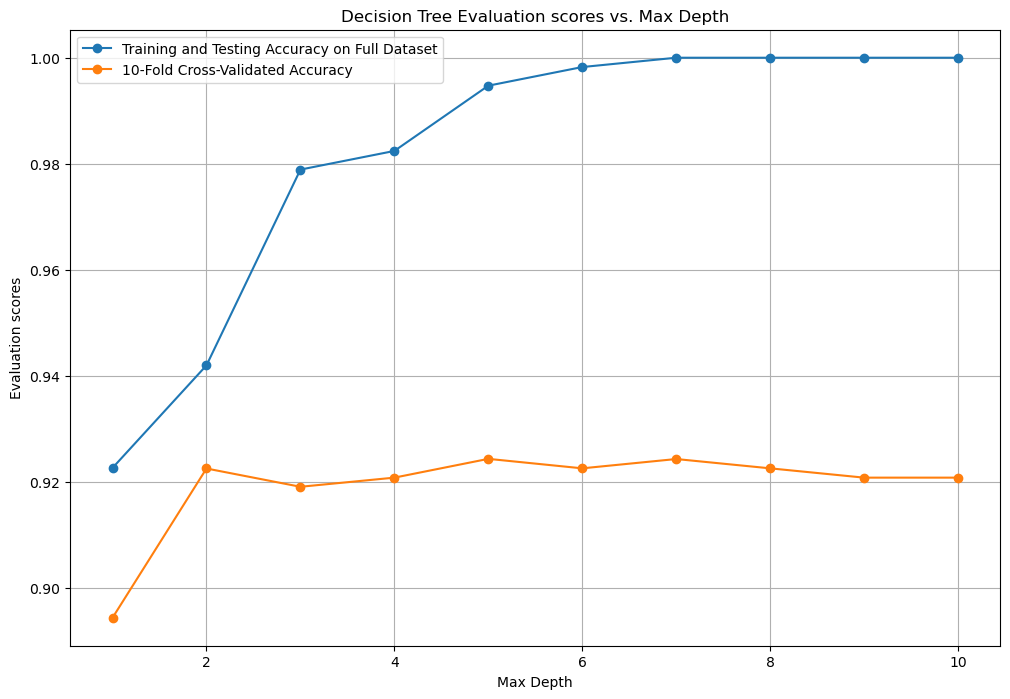

In [14]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
X = df.drop(columns=['target']) 
y = df['target']
train_accuracies = []
cv_accuracies = []
max_depths = range(1, 11)

for depth in max_depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=10)
    clf.fit(X, y)
    y_pred = clf.predict(X)
    train_accuracy = accuracy_score(y, y_pred)
    train_accuracies.append(train_accuracy)

    kf = KFold(n_splits=10, shuffle=True, random_state=10)
    train_accuracy_cv = np.mean(cross_val_score(clf, X, y, cv=kf))
    cv_accuracies.append(train_accuracy_cv)

plt.figure(figsize=FIGSIZE)
plt.plot(max_depths, train_accuracies, label='Training and Testing Accuracy on Full Dataset', marker='o', linestyle='-')
plt.plot(max_depths, cv_accuracies, label='10-Fold Cross-Validated Accuracy', marker='o', linestyle='-')

plt.xlabel('Max Depth')
plt.ylabel('Evaluation scores')
plt.title('Decision Tree Evaluation scores vs. Max Depth')
plt.legend()
plt.grid(True)
plt.show()


### (b) 
Answer the questions below based on the results of 2a. Write your answers in the
corresponding field in the markdown cell that is present in the HW1 template notebook.
Do this by double clicking the markdown cell and writing your answer directly in the
cell. Pressing enter will re-render the markdown.

#### (i.)
What setting of `max_depth` gave the best accuracy w.r.t. the **full-dataset** accuracy?
If more than one setting equaled the best accuracy, list each of the best settings.

**Student answer here:** 
 Answer: For the full dataset, it gives the best accuracies while max depth was 7,8,9 and 10. 


#### (ii.)
What setting of `max_depth`  gave the best accuracy w.r.t. the **cross-
validated** accuracy? If more than one setting equaled the best accuracy, list each of the best settings.

**Student answer here:** 
Answer: For the cross-validated accuracy, it gives the best accuracies while max depth was 5 and 7.


## 3\. 
This question explores random forest classifiers by using scikit-learn’s `ensemble.RandomForestClassifier`.
You will make two plots and answer questions about them.

### (a) 
For the first plot, use a `ensemble.RandomForestClassifier` and the best depth you
found 2(b)ii as `max_depth`. We will now find the optimal setting of a second parameter,
n estimators. Vary the number of trees in the forest via the parameter `n_estimators`
and plot its 10-fold cross-validated accuracy (use `n_estimators` = 1, 2, . . . , 20). Again,
use 10 as your random seed for your classifier and cross-validation.

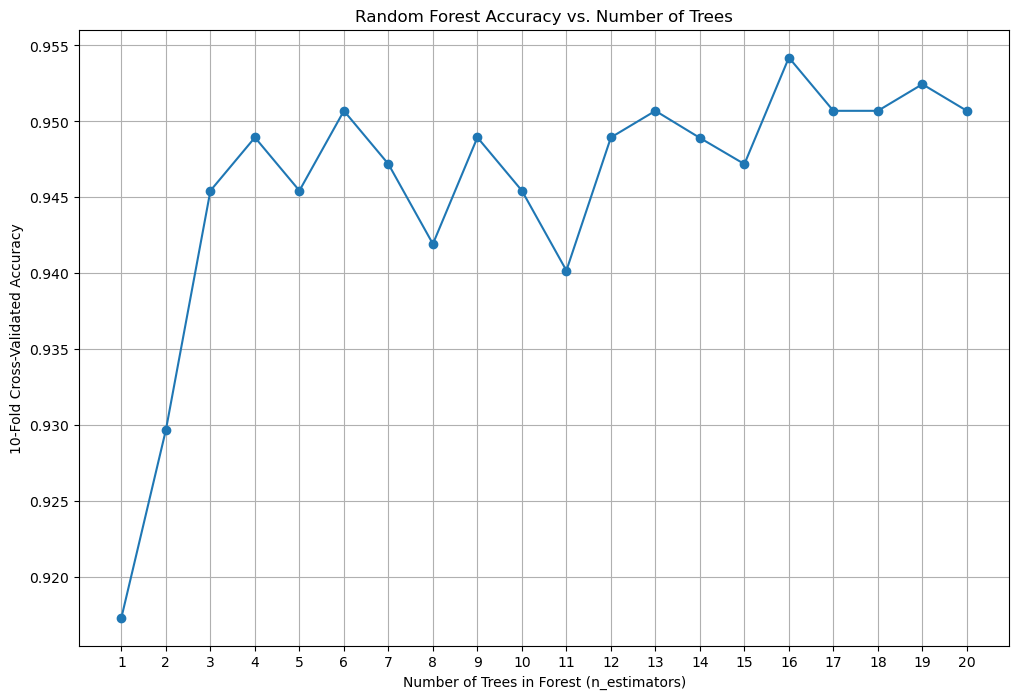

In [15]:
from sklearn.ensemble import RandomForestClassifier

best_max_depth = 5  #In 2b(ii) 
cv_accuracies = []
n_estimators_range = range(1, 21) 
kf = KFold(n_splits=10, shuffle=True, random_state=10)
for n in n_estimators_range:
    clf = RandomForestClassifier(n_estimators=n, max_depth=best_max_depth, random_state=10)
    cv_accuracy = np.mean(cross_val_score(clf, X, y, cv=kf))
    cv_accuracies.append(cv_accuracy)

plt.figure(figsize=FIGSIZE)
plt.plot(n_estimators_range, cv_accuracies, marker='o', linestyle='-')

plt.xticks(n_estimators_range)
plt.xlabel('Number of Trees in Forest (n_estimators)')
plt.ylabel('10-Fold Cross-Validated Accuracy')
plt.title('Random Forest Accuracy vs. Number of Trees')
plt.grid(True)
plt.show()

### (b) 
Do you see an improvement using random forests versus using a single tree? (Note: use
the `n_estimators`=1 result as the result for a single tree.)

**Student answer here:** 
Answer: Yes, I see improvement using random forests versus using a single tree. When i used random forests (n_estimators>1), it gives greater than approximately 0.95 best accuracy. But using single tree gives approximately 0.92 accuracy.


In [10]:
clf = RandomForestClassifier(n_estimators=1, max_depth=best_max_depth, random_state=10)
cv_accuracy = np.mean(cross_val_score(clf, X, y, cv=kf))
print(cv_accuracy)



0.9172932330827068


### (c) 
What setting of `n_estimators` gave the best accuracy w.r.t. the cross-validated ac-
curacy?

**Student answer here:** 
Answer: From the above plot, we can see that while n_estimators = 16, it gave the best accuracy. 

### (d) 
For the second plot, again use a `ensemble.RandomForestClassifier`, but this time
you will fix the `n_estimators` parameter and again attempt to find the optimal setting
of a `max_depth`. Use your answer to 3c as the setting for `n_estimators` and follow the
procedure from 2a to find the best setting for max depth. This time, only plot the results
from cross-validation and not the full set, but the plot should be the same structure
as in 2a otherwise (use `max_depth` = 1,2,. . . ,10). Again, use 10 as your random seed.

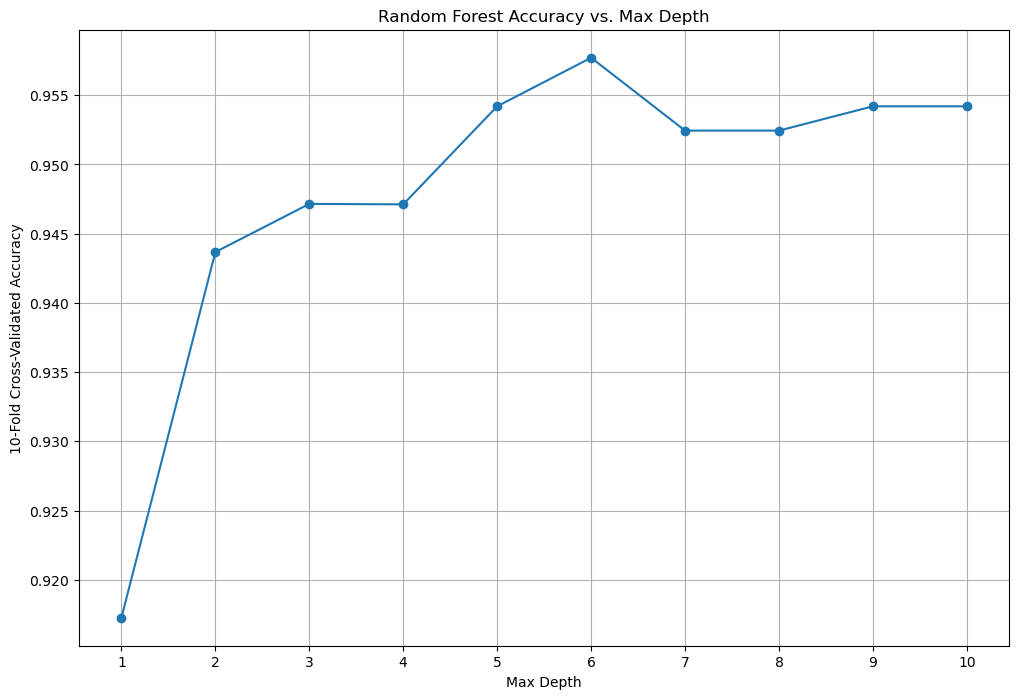

In [16]:
n_estimators = 16  # from 3c
max_depth_range = range(1, 11)
kf = KFold(n_splits=10, shuffle=True, random_state=10)
cv_accuracies = []
for max_depth in max_depth_range:
    clf = RandomForestClassifier(n_estimators= n_estimators, max_depth=max_depth, random_state=10)
    cv_accuracy = np.mean(cross_val_score(clf, X, y, cv=kf))
    cv_accuracies.append(cv_accuracy)

plt.figure(figsize=FIGSIZE)
plt.plot(max_depth_range, cv_accuracies, marker='o', linestyle='-')

plt.xticks(max_depth_range)
plt.xlabel('Max Depth')
plt.ylabel('10-Fold Cross-Validated Accuracy')
plt.title('Random Forest Accuracy vs. Max Depth')
plt.grid(True)
plt.show()

### (e) 
In the plot in 3d, is the optimal setting of `max_depth` the same as in 2(b)ii? If not, what
is the new optimal setting of `max_depth`?

**Student answer here:** 
Answer: No. In the plot 2b(ii) , the optimal setting of max depth was 5 and 7 and the accuracy was slightly greater than 0.92.  So it is not the same as in the plot 3d. In the plot 3d, the optimal setting of max depth is 6 and the accuracy is greater than 0.955.
## 4\. 
For this last question, we will explore the dependability of our estimates. 
### (a) 
Make a plot using the following procedure:
#### i. 
Using random state values from 0, 1, · · · , 99 calculate the 10-fold cross-validation
accuracy of different `tree.DecisionTreeClassifiers` with max depth settings from
1, 2, · · · , 10.
As before, you should use the same random state value for your classifier and cross-validation.
#### ii. 
Then record the best max depth settings for each random state. Be sure to check whether multiple settings
achieve the best accuracy.


Plot the counts for the best max depth settings as a bar chart with the max depth settings on the x-axis and the 'best parameter counts' on the y-axis (number of times that parameter was selected as the best max depth setting).

*Note*: this calculation might take some time. For debugging, try a smaller range of
random states.

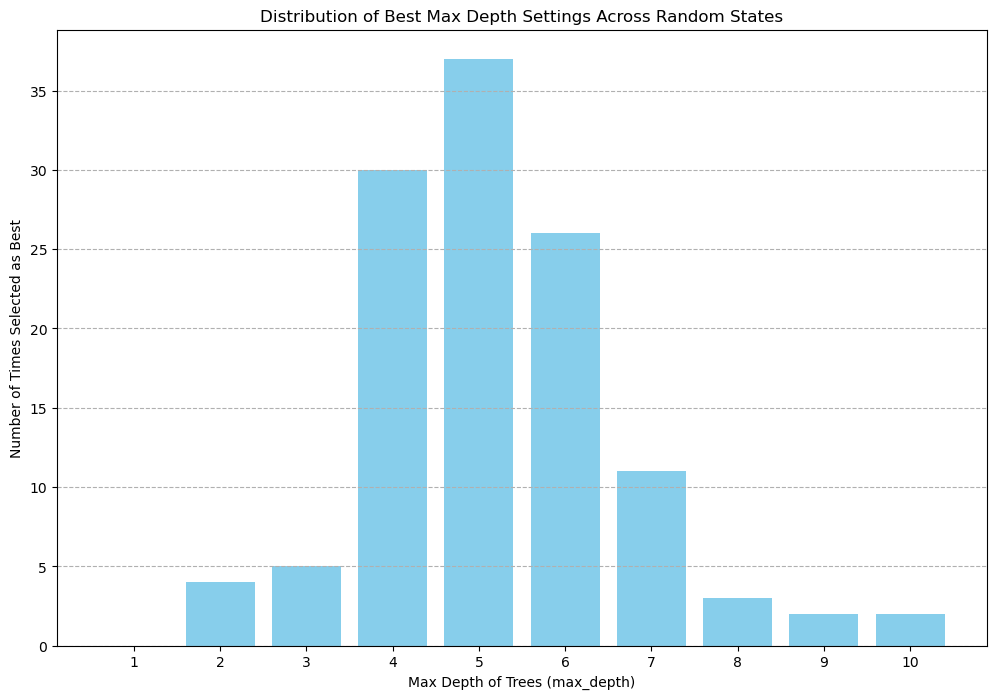

In [17]:
random_states = range(100) 
max_depth_range = range(1, 11)
best_max_depth_counts = {depth: 0 for depth in max_depth_range}

for random_state in random_states:
    cv_accuracies = []
    for max_depth in max_depth_range:
        clf = DecisionTreeClassifier(max_depth=max_depth, random_state=random_state)
        kf = KFold(n_splits=10, shuffle=True, random_state=random_state)
        cv_accuracy = np.mean(cross_val_score(clf, X, y, cv=kf))
        cv_accuracies.append(cv_accuracy)
    
    max_accuracy = max(cv_accuracies)
    best_depths = [depth for depth, accuracy in zip(max_depth_range, cv_accuracies) if accuracy == max_accuracy]
    
    for depth in best_depths:
        best_max_depth_counts[depth] += 1

plt.figure(figsize=FIGSIZE)
plt.bar(best_max_depth_counts.keys(), best_max_depth_counts.values(), color='skyblue')

plt.xlabel('Max Depth of Trees (max_depth)')
plt.ylabel('Number of Times Selected as Best')
plt.title('Distribution of Best Max Depth Settings Across Random States')
plt.xticks(range(1, 11))
plt.grid(axis='y', linestyle='--')

plt.show()

### (b) 
What are the top two most frequent parameter settings?

**Student answer here:** 
Answer: Top two most frequent parameter settings seems to be max_depth = 5 (with counts greater than 35) and max_depth = 4 (with counts 30)   from  the plot of 4a) . 